<a href="https://colab.research.google.com/github/saish15/Machine-Learning/blob/master/Coronavirus_2019_prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install kaggle
!mkdir .kaggle
import json
token = {"username":"saishur","key":"97c36f52ccb038414d93918c82f58829"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
import json
token = {"username":"saishur","key":"97c36f52ccb038414d93918c82f58829"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset -p/content --force

  0% 0.00/4.06k [00:00<?, ?B/s]
100% 4.06k/4.06k [00:00<00:00, 3.52MB/s]


In [0]:
!unzip \*.zip

Archive:  novel-corona-virus-2019-dataset.zip
  inflating: 2019_nCoV_data.csv      


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/novel-corona-virus-2019-dataset.zip
/content/2019_nCoV_data.csv
/content/.config/.last_survey_prompt.yaml
/content/.config/gce
/content/.config/active_config
/content/.config/.last_update_check.json
/content/.config/config_sentinel
/content/.config/.metricsUUID
/content/.config/logs/2020.01.13/16.37.08.645258.log
/content/.config/logs/2020.01.13/16.37.40.784290.log
/content/.config/logs/2020.01.13/16.37.53.933238.log
/content/.config/logs/2020.01.13/16.37.24.945113.log
/content/.config/logs/2020.01.13/16.37.53.587497.log
/content/.config/logs/2020.01.13/16.37.37.002045.log
/content/.config/configurations/config_default
/content/.kaggle/kaggle.json
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/california_housing_train.csv


In [0]:
CoronaV = pd.read_csv('/content/2019_nCoV_data.csv')
print(CoronaV.head(10))
print('\n')

   Sno Province/State Country      Last Update  Confirmed  Deaths  Recovered
0    1          Anhui   China  1/22/2020 12:00        1.0     0.0        0.0
1    2        Beijing   China  1/22/2020 12:00       14.0     0.0        0.0
2    3      Chongqing   China  1/22/2020 12:00        6.0     0.0        0.0
3    4         Fujian   China  1/22/2020 12:00        1.0     0.0        0.0
4    5          Gansu   China  1/22/2020 12:00        0.0     0.0        0.0
5    6      Guangdong   China  1/22/2020 12:00       26.0     0.0        0.0
6    7        Guangxi   China  1/22/2020 12:00        2.0     0.0        0.0
7    8        Guizhou   China  1/22/2020 12:00        1.0     0.0        0.0
8    9         Hainan   China  1/22/2020 12:00        4.0     0.0        0.0
9   10          Hebei   China  1/22/2020 12:00        1.0     0.0        0.0




In [0]:
X = CoronaV['Deaths'].values.reshape(-1,1)
y = CoronaV['Recovered'].values.reshape(-1,1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#To retrieve the intercept:
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)

[0.51]
[[0.61]]


In [0]:
y_pred = regressor.predict(X_test)

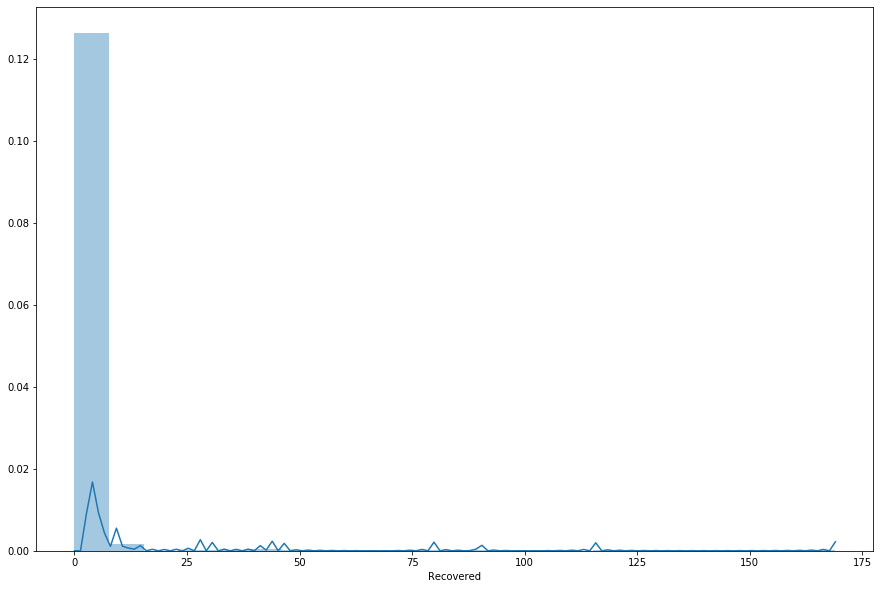

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as seabornInstance
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(CoronaV['Recovered'])

In [0]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,1.0,0.509765
1,0.0,0.509765
2,0.0,1.121056
3,1.0,1.121056
4,0.0,0.509765
...,...,...
95,0.0,0.509765
96,0.0,0.509765
97,3.0,0.509765
98,0.0,0.509765


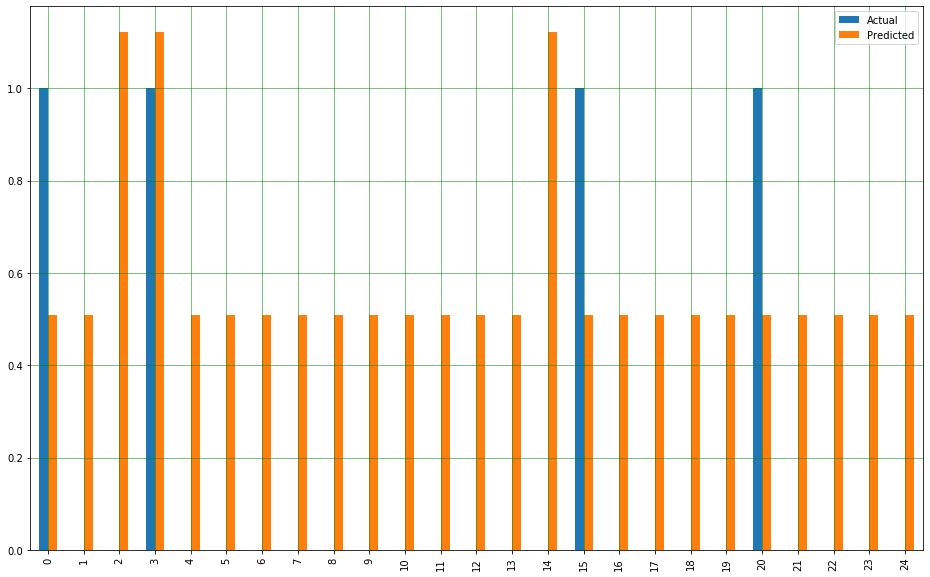

In [0]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [0]:
# transform data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)



In [0]:
# split training feature and target sets into training and validation subsets
from sklearn.model_selection import train_test_split

X_train_sub, X_validation_sub, y_train_sub, y_validation_sub = train_test_split(X_train_scale, y_train, random_state=0)



In [0]:
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


In [0]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.07],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)

In [0]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(347, 1) (75, 1) (75, 1) (347, 1) (75, 1) (75, 1)


In [0]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([Dense(32, activation='relu', input_shape=(1,)), Dense(32, activation='relu'), Dense(1, activation='sigmoid'),])

In [0]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs=500, validation_data=(X_val, Y_val))

Train on 347 samples, validate on 75 samples
Epoch 1/500
347/347 [==============================] - 1s 3ms/step - loss: 0.5931 - acc: 0.4265 - val_loss: -0.1964 - val_acc: 0.0933
Epoch 2/500
347/347 [==============================] - 0s 71us/step - loss: 0.1159 - acc: 0.0893 - val_loss: -1.3010 - val_acc: 0.0933
Epoch 3/500
347/347 [==============================] - 0s 71us/step - loss: -0.4263 - acc: 0.0893 - val_loss: -2.5214 - val_acc: 0.0933
Epoch 4/500
347/347 [==============================] - 0s 68us/step - loss: -1.0351 - acc: 0.0893 - val_loss: -4.2399 - val_acc: 0.0933
Epoch 5/500
347/347 [==============================] - 0s 64us/step - loss: -1.8700 - acc: 0.0893 - val_loss: -6.7607 - val_acc: 0.0933
Epoch 6/500
347/347 [==============================] - 0s 72us/step - loss: -3.0645 - acc: 0.0893 - val_loss: -10.8881 - val_acc: 0.0933
Epoch 7/500
347/347 [==============================] - 0s 60us/step - loss: -5.2642 - acc: 0.0893 - val_loss: -18.6641 - val_acc: 0.0933
Epoc

In [0]:
model.evaluate(X_test, Y_test)[1]

75/75 [==============================] - 0s 117us/step


0.8000000031789144

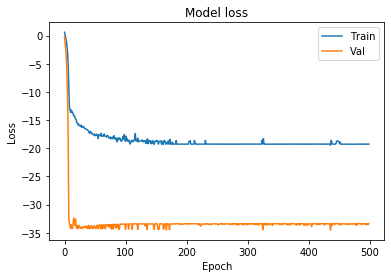

In [0]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

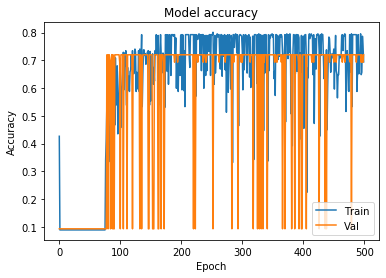

In [0]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [0]:
model_2 = Sequential([Dense(1000, activation='relu', input_shape=(1,)), Dense(1000, activation='relu'), Dense(1000, activation='relu'), Dense(1000, activation='relu'),    Dense(1, activation='sigmoid'),])

In [0]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
hist_2 = model_2.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Train on 347 samples, validate on 75 samples
Epoch 1/100
347/347 [==============================] - 2s 6ms/step - loss: -1.0837 - acc: 0.1527 - val_loss: -30.6357 - val_acc: 0.0933
Epoch 2/100
347/347 [==============================] - 1s 2ms/step - loss: -14.5943 - acc: 0.0893 - val_loss: -34.2438 - val_acc: 0.0933
Epoch 3/100
347/347 [==============================] - 1s 2ms/step - loss: -16.5040 - acc: 0.0893 - val_loss: -33.7920 - val_acc: 0.0933
Epoch 4/100
347/347 [==============================] - 1s 2ms/step - loss: -18.0480 - acc: 0.0893 - val_loss: -34.1778 - val_acc: 0.0933
Epoch 5/100
347/347 [==============================] - 1s 2ms/step - loss: -18.7790 - acc: 0.2738 - val_loss: -34.0726 - val_acc: 0.0933
Epoch 6/100
347/347 [==============================] - 1s 2ms/step - loss: -19.1564 - acc: 0.5101 - val_loss: -33.3494 - val_acc: 0.7200
Epoch 7/100
347/347 [==============================] - 1s 2ms/step - loss: -18.3626 - acc: 0.7925 - val_loss: -33.3917 - val_acc: 0.72

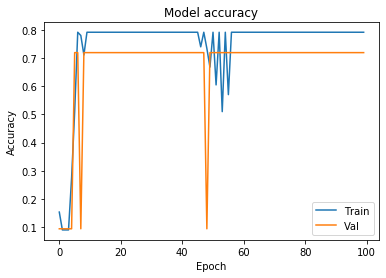

In [0]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [0]:
from keras.layers import Dropout
from keras import regularizers

In [0]:
model_3 = Sequential([Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(1,)),    Dropout(0.3),    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    Dropout(0.3),    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)), Dropout(0.3), Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)), Dropout(0.3), Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),])

In [0]:
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
hist_3 = model_3.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Train on 347 samples, validate on 75 samples
Epoch 1/100
347/347 [==============================] - 3s 8ms/step - loss: 23.6623 - acc: 0.1499 - val_loss: 14.5668 - val_acc: 0.0933
Epoch 2/100
347/347 [==============================] - 1s 2ms/step - loss: 10.5673 - acc: 0.0893 - val_loss: -16.2890 - val_acc: 0.0933
Epoch 3/100
347/347 [==============================] - 1s 2ms/step - loss: -5.7204 - acc: 0.0893 - val_loss: -28.3987 - val_acc: 0.0933
Epoch 4/100
347/347 [==============================] - 1s 2ms/step - loss: -10.9076 - acc: 0.0893 - val_loss: -30.0774 - val_acc: 0.0933
Epoch 5/100
347/347 [==============================] - 1s 2ms/step - loss: -12.9915 - acc: 0.0893 - val_loss: -30.4943 - val_acc: 0.0933
Epoch 6/100
347/347 [==============================] - 1s 2ms/step - loss: -14.4369 - acc: 0.0893 - val_loss: -30.4817 - val_acc: 0.0933
Epoch 7/100
347/347 [==============================] - 1s 2ms/step - loss: -15.2927 - acc: 0.0893 - val_loss: -30.5524 - val_acc: 0.0933


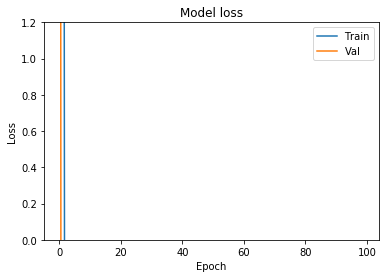

In [0]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

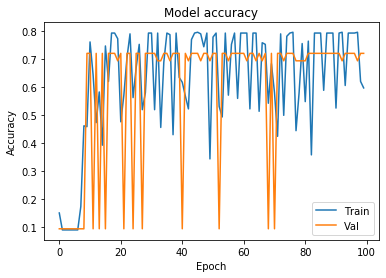

In [0]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [0]:
model.evaluate(X_test, Y_test)[1]

75/75 [==============================] - 0s 191us/step


0.8000000031789144

IndentationError: ignored